('wet angle of repose: ', 0.46630765815499858, 25.0)
('beach slope: ', 0.02, 1.1457628381751035)
('failure angle: ', 1.0076445808463947, 45.218166156499294)
('dune slope: ', 0.05, 2.8624052261117479)
('Eroded volume: ', 0.18084710838307211, 0.020152891616927897, 0.0010000000000000002)
('A,B,C', array([  23.85423716,  112.07335952,   44.07240332]))
('b, c = ', 1.0915914854264472, 0.81932879156631067)
('xs, xl', 0.81916497495134399, 0.17015288855354893)


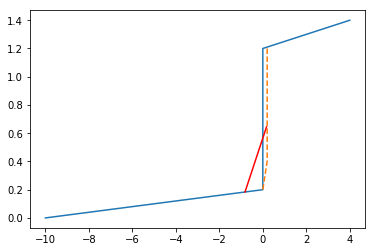

In [1]:
# Beach erosion via scarp failure
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

# internal friction angle (is this the same as angle of repose?)
phiw = 25.*(np.pi/180.)
tanphiw = np.tan(phiw)
# beach slope
tanalphas = 1./50.
alphas = np.arctan(tanalphas)
# failure angle
alpha = 0.25*np.pi+0.5*phiw*np.pi/180.
tanalpha = np.tan(alpha)
# dune slope
tanalphad = 1./20.
alphad = np.arctan(tanalphad)
print("wet angle of repose: ",tanphiw,(180./np.pi)*phiw)
print("beach slope: ",tanalphas,(180./np.pi)*alphas)
print("failure angle: ",tanalpha,(180./np.pi)*alpha)
print("dune slope: ",tanalphad,(180./np.pi)*alphad)

xi = .2
zs = 1.
zi = xi*tanalpha
# wedge of inundated sediment below slump block
Vi = 0.5*xi*zi
# wedge of dune on top of slump block
Vd = 0.5*xi*xi*tanalphad
# volume of slump block
Ve = zs*xi-Vi+Vd
print("Eroded volume: ",Ve,Vi,Vd)

# first, try calcs assuming slump lies against slip face
# we know the angles of the wedge of slumped sand
A = phiw-alphas
C = alpha-alphas
B = np.pi-(A+C)
print("A,B,C",180./np.pi*np.array((A,B,C)))
# and we know the area (volume per unit alonghore) of the wedge, so
# use ASA to calculate sides
# no cotangent function, use cot = 1/tan
c = np.sqrt(Ve*2.*(1./np.tan(A)+1./np.tan(B)))
b = np.sqrt(Ve*2.*(1./np.tan(A)+1./np.tan(C)))
print("b, c = ",b,c)
xs = c*np.cos(alphas)
xl = b*np.cos(phiw)-xs
print("xs, xl",xs,xl)

if xl > xi:
    print('xl>xi...do calcs for slump resting against scarp')
    xl = xi
    Vis = 0.5*xi*xi*(tanalpha-tanphiw)
    xs = np.sqrt(2.*(Ve+Vis)/(tanphiw-tanalphas))-xi
    # check volume
    Ve2 = 0.5*(xs+xl)**2.*tanphiw-0.5*(xs+xl)**2.*tanalphas-Vis
    print("Ve, Ve2, diff:", Ve,Ve2,Ve-Ve2)
    print("xs, xl",xs,xl)
    
# plot some points
zb = .2
zs = 1.
xb = -zb/tanalphas
zdt = zb+zs+.2
xdt = (zdt-(zb+zs))/tanalphad
zxs = zb-xs*tanalphas
zslump = (xs+xl)*tanphiw+zxs
x = np.array((xb,0.,0.,xdt))
y = np.array((0,zb,zb+zs,zdt))
plt.plot(x,y)
plt.plot((0.,xi,xi),(zb,zb+zi,zb+zs+tanalphad*xi),'--')
plt.plot((-xs,xl),(zxs,zslump),'-r')

In [2]:
# q= -K(PHI)*dPHI/dx - eqn 3
rho = 1025
g = 9.81
por = 0.3
rhosb = por*rhos+(1.-por)*rho
# PHI = pressure head (m)
PHI = 
# K = hydraulic conductivity (m/s)
Pw = rho*g*PHI
# theta = volumentric water content of the pore spaces (m3/m3)
# thetar = residual water content (initial value for a dry dune)
# thetas = saturated water content
# relative water content THETA i
THETA = (theta-thetar)/(thetas-thetar)

# Lateral earth force
delz0 - zc-zb
FE = rhosb*g*delz0/(2.*tanalpha2 )-Pw*THETA*(1.-1./tanalpha2)*delz0 # Eqn 21

# Weight force of potential slump block
FW = (rhosb*g+rho*g*theta)*(delzd-0.5*delxI*tanalpha)*delxI # Egn 23

# Destabilizing force - eqn. 22
FD = FW*np.sin(alpha)+FE*np.cos(alpha)
FT = 2.*(-Pw)*THETA*tanphiw*np.tan(0.25*np.pi+0.5*phiw)*delzl
# Stabilizing force - eqn. 25
FS = (FW*np.cos(alpha)* + FE*np.sin(alpha) + (-Pw)*THETA*delxl/np.cos(alpha))*tanphiw+FT

SyntaxError: invalid syntax (<ipython-input-2-8f7877454480>, line 7)